# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import glob
import pandas as pd

#### To-Do - Use glob to match the pattern "csv"

In [2]:
path = r'C:\Users\hp 15\Desktop\Ustacky_project'
files = glob.glob(path + '/*.csv')

In [3]:
li = []
for file in files:
    branch_data = pd.read_csv(file)
    li.append(branch_data)
    print('created a dataframe for {}, with shape {}'.format(file, branch_data.shape))

created a dataframe for C:\Users\hp 15\Desktop\Ustacky_project\Abuja_Branch.csv, with shape (332, 17)
created a dataframe for C:\Users\hp 15\Desktop\Ustacky_project\Lagos_Branch.csv, with shape (340, 17)
created a dataframe for C:\Users\hp 15\Desktop\Ustacky_project\Port_Harcourt_Branch.csv, with shape (328, 17)


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [4]:
market_data = pd.concat(li, axis = 0)
print(market_data.shape)

(1000, 17)


In [5]:
market_data.to_csv('company_xyz', index = False)

#### To-Do -Read the CSV file using `pd.read_csv` method

In [6]:
company_xyz = pd.read_csv('company_xyz')

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [35]:
company_xyz.head(15)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-05-30 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-05-30 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-05-30 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-05-30 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-05-30 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15
5,371-85-5789,B,Abuja,Normal,Male,Health and beauty,31672.8,3,4750.92,99769.32,...,2021-05-30 10:40:00,Epay,95018.4,4.761905,4750.92,5.1,5,3,2019,10
6,273-16-6619,B,Abuja,Normal,Male,Home and lifestyle,11952.0,2,1195.20,25099.20,...,2021-05-30 12:20:00,Card,23904.0,4.761905,1195.20,4.4,15,3,2019,12
7,649-29-6775,B,Abuja,Normal,Male,Fashion accessories,12067.2,1,603.36,12670.56,...,2021-05-30 15:31:00,Cash,12067.2,4.761905,603.36,6.7,8,2,2019,15
8,145-94-9061,B,Abuja,Normal,Female,Food and beverages,31809.6,5,7952.40,167000.40,...,2021-05-30 19:48:00,Cash,159048.0,4.761905,7952.40,9.6,25,1,2019,19
9,871-79-8483,B,Abuja,Normal,Male,Fashion accessories,33886.8,5,8471.70,177905.70,...,2021-05-30 19:39:00,Card,169434.0,4.761905,8471.70,4.8,25,2,2019,19


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [9]:
company_xyz.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [10]:
company_xyz.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [12]:
company_xyz.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

* From the data statistical summary, I can see that there are no outliers in the data, as I can see the minimum, first quartile, second quartile, third quartile and the maximum value of each numerical variable. 

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [13]:
company_xyz.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [14]:
company_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [15]:
company_xyz['Date'] = pd.to_datetime(company_xyz['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [16]:
company_xyz['Date'].dtype

dtype('<M8[ns]')

In [17]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

#### To-Do - Repeat the two steps above to the `time` column

In [18]:
company_xyz['Time'] = pd.to_datetime(company_xyz['Time'])

In [19]:
company_xyz['Time'].dtype

dtype('<M8[ns]')

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [20]:
company_xyz['Day'] = company_xyz['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [21]:
company_xyz['Month'] = company_xyz['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [22]:
company_xyz['Year'] = company_xyz['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [23]:
company_xyz['Hour'] = company_xyz['Time'].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [24]:
company_xyz['Hour'].nunique()

11

In [25]:
company_xyz['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [26]:
categorical_columns = [col for col in company_xyz.columns if company_xyz[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [27]:
#Example - Uncomment the Code and Run it
company_xyz['Branch'].unique().tolist()

['B', 'A', 'C']

In [28]:
print("Total Number of unique values in the Branch Column : {}". format(len(company_xyz['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [29]:
for column in categorical_columns:
    if column != 'Branch':
        print("Total Number of unique values in the {} Column : {}". format(column, len(company_xyz[column].unique().tolist())))  

Total Number of unique values in the Invoice ID Column : 1000
Total Number of unique values in the City Column : 3
Total Number of unique values in the Customer type Column : 2
Total Number of unique values in the Gender Column : 2
Total Number of unique values in the Product line Column : 6
Total Number of unique values in the Payment Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [30]:
#Example
company_xyz['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [31]:
for column in categorical_columns:
    if column != 'City':
        print('The count of unique values in {} column are:'.format(column))
        print(company_xyz[column].value_counts(), '\n')

The count of unique values in Invoice ID column are:
334-64-2006    1
767-97-4650    1
659-36-1684    1
286-01-5402    1
834-45-5519    1
              ..
266-20-6657    1
732-94-0499    1
735-32-9839    1
146-09-5432    1
219-22-9386    1
Name: Invoice ID, Length: 1000, dtype: int64 

The count of unique values in Branch column are:
A    340
B    332
C    328
Name: Branch, dtype: int64 

The count of unique values in Customer type column are:
Member    501
Normal    499
Name: Customer type, dtype: int64 

The count of unique values in Gender column are:
Female    501
Male      499
Name: Gender, dtype: int64 

The count of unique values in Product line column are:
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 

The count of unique values in Payment column are:
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int6

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [32]:
grouped_city = company_xyz.groupby('City')

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [32]:
gross_income_city = pd.DataFrame(grouped_city['gross income'].sum())
gross_income_city

,gross income
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


In [33]:
gross_income_city['gross income'].max()

1895463.539999999

In [34]:
print('The city with the highest total gross income is Port Harcourt with a gross income of {}'.format(gross_income_city['gross income'].max()))

The city with the highest total gross income is Port Harcourt with a gross income of 1895463.539999999


In [35]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

In [36]:
grouped_city_product = company_xyz.groupby(['Product line','City'])

In [37]:
grouped_city_product.agg({'Total': 'sum', 'Quantity' : 'sum'})

Total  Quantity
Product line           City                               
Electronic accessories Abuja          6138519.66       316
                       Lagos          6594160.86       322
                       Port Harcourt  6828830.82       333
Fashion accessories    Abuja          5908793.94       297
                       Lagos          5879703.06       263
                       Port Harcourt  7761625.20       342
Food and beverages     Abuja          5477359.86       270
                       Lagos          6178716.18       313
                       Port Harcourt  8556067.80       369
Health and beauty      Abuja          7193037.60       320
                       Lagos          4535191.08       257
                       Port Harcourt  5981517.36       277
Home and lifestyle     Abuja          6317699.22       295
                       Lagos          8070190.38       371
                       Port Harcourt  5002399.08       245
Sports and travel      Abuja          7195751.64       322
                       Lagos          6974171.82       333
                       Port Harcourt  5674294.08       265

* From the table above, we can see the product line that generates the most revenue in each city, that is the product that customers tend to buy most in each city.

In [36]:
grouped_product = company_xyz.groupby('Product line')
grouped_product['Unit price'].mean()

Product line
Electronic accessories    19278.571765
Fashion accessories       20575.314607
Food and beverages        20163.186207
Health and beauty         19747.610526
Home and lifestyle        19914.097500
Sports and travel         20517.571084
Name: Unit price, dtype: float64

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

Text(0.5, 1.0, 'Branch with the highest sales record')

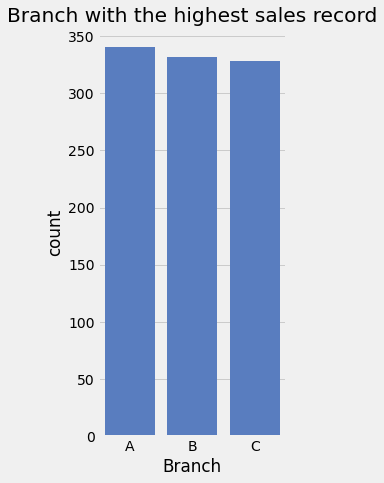

In [37]:
plt.figure(figsize = (3, 7))
sns.set_color_codes('muted')
ax = sns.countplot(x = company_xyz['Branch'], color = 'b', order = company_xyz['Branch'].value_counts().index)
ax.set_title('Branch with the highest sales record')

Text(0.5, 1.0, 'City that generated the most amount of sales')

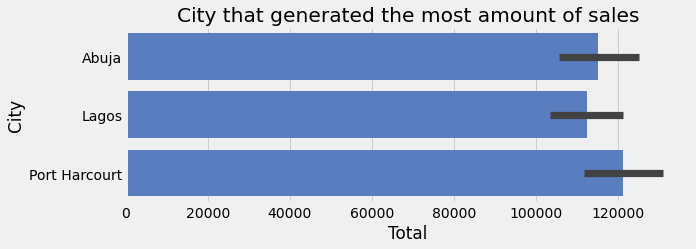

In [38]:
plt.figure(figsize = (9, 3))
sns.set_color_codes('muted')
ax = sns.barplot(y = company_xyz['City'], x = company_xyz['Total'], color = 'b')
ax.set_title('City that generated the most amount of sales')

#### Explore a countplot for the 'payment' and 'city' column

Text(0.5, 1.0, 'Most used payment method')

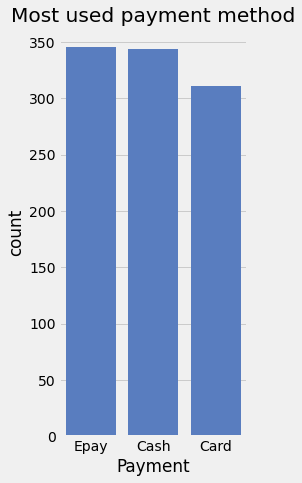

In [39]:
plt.figure(figsize = (3, 7))
sns.set_color_codes('muted')
ax = sns.countplot(company_xyz['Payment'], color = 'b', order = company_xyz['Payment'].value_counts().index)
ax.set_title('Most used payment method')

Text(0.5, 1.0, 'City with the most sales record')

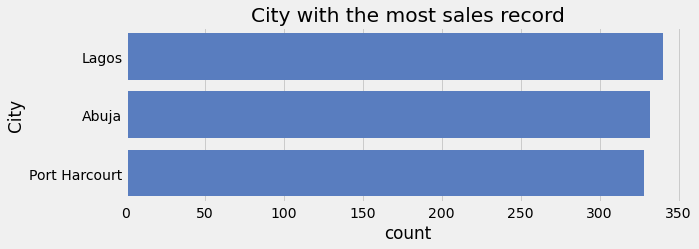

In [40]:
plt.figure(figsize = (9, 3))
sns.set_color_codes('muted')
ax = sns.countplot(y = company_xyz['City'], color = 'b', order = company_xyz['City'].value_counts().index)
ax.set_title('City with the most sales record')

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'Highest Product Line Sold')

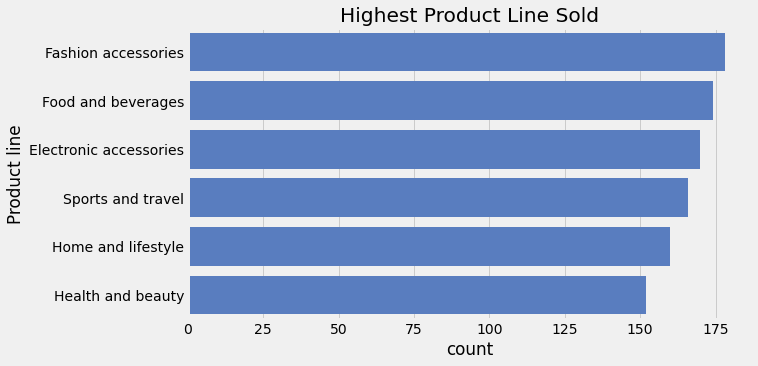

In [41]:
plt.figure(figsize = (9,5))
sns.set_color_codes("muted")
ax = sns.countplot(y = company_xyz['Product line'], color = 'b', order = company_xyz['Product line'].value_counts().index)
ax.set_title('Highest Product Line Sold')

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'Most Used Payment Channel for Each Product Line')

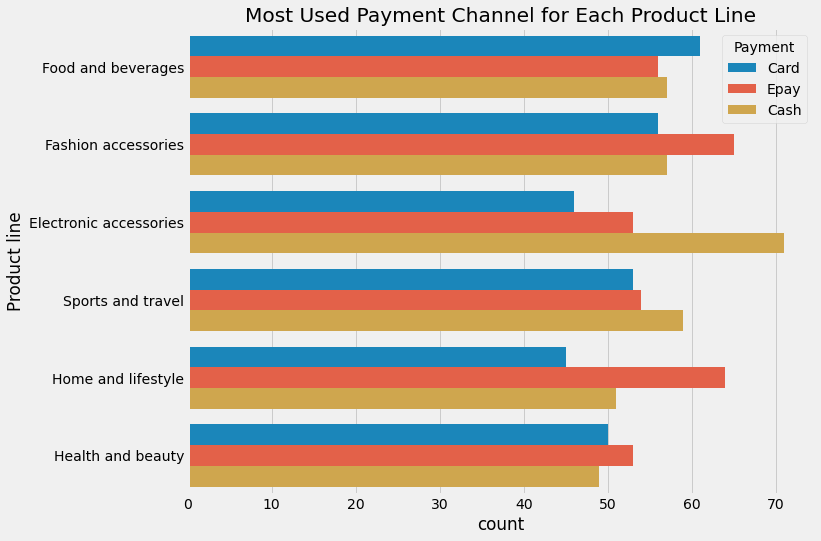

In [42]:
plt.figure(figsize = (10,8))
ax = sns.countplot(y = company_xyz['Product line'], hue = company_xyz['Payment'])
ax.set_title('Most Used Payment Channel for Each Product Line')

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'Most Used Payment Channel for Each Branch')

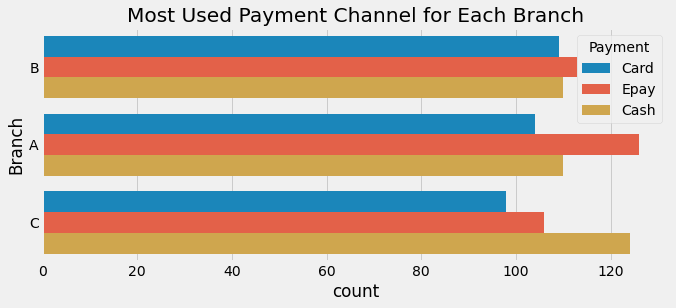

In [43]:
plt.figure(figsize = (10,4))
ax = sns.countplot(y = company_xyz['Branch'], hue = company_xyz['Payment'])
ax.set_title('Most Used Payment Channel for Each Branch')

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

Text(0.5, 1.0, 'Rating of each Branch')

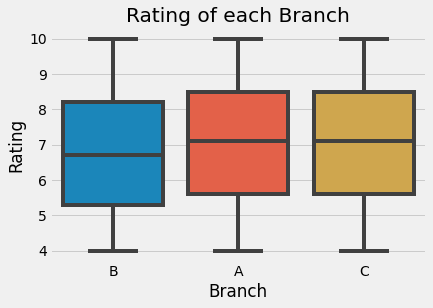

In [44]:
ax = sns.boxplot(x = 'Branch', y= 'Rating', data = company_xyz)
ax.set_title('Rating of each Branch')

* From the plot above, the branch with the lowest rating is Branch 'B'

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

Text(0.5, 1.0, 'Quantity of Product Line Bought by Males and Females')

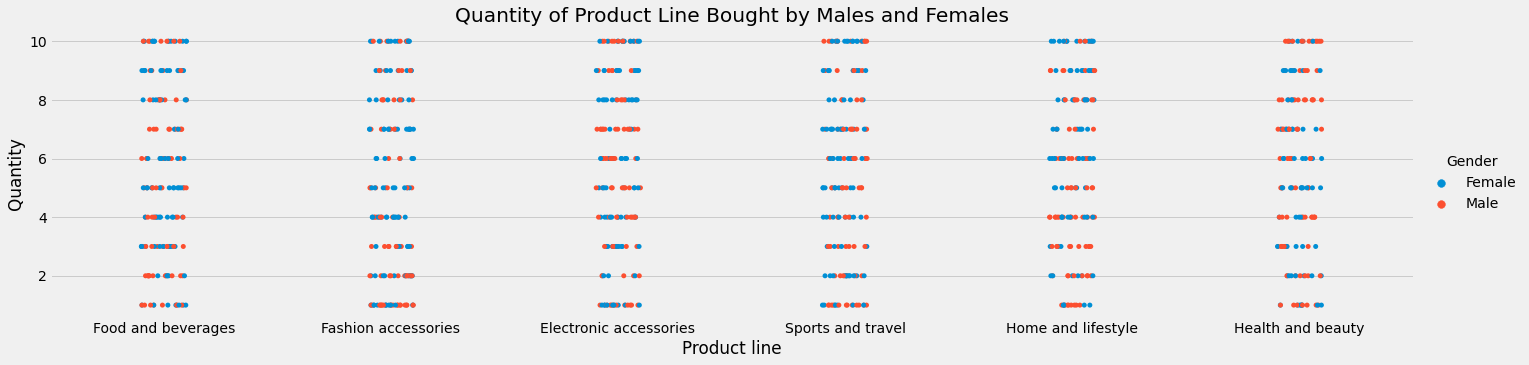

In [45]:
sns.catplot(x='Product line', y = 'Quantity', hue = 'Gender', aspect = 4, data = company_xyz)
plt.title('Quantity of Product Line Bought by Males and Females')

* More Quantity of Food and beverages, Fashion accessories, Sports and travel, Home and lifestyle were bought by females than males
* The females bought more of the home and lifestyle product than they bought any other product
* More men bought the health and beauty product than the females.

Text(0.5, 1.0, 'Revenue Generated by Males and Females in Each Product Line')

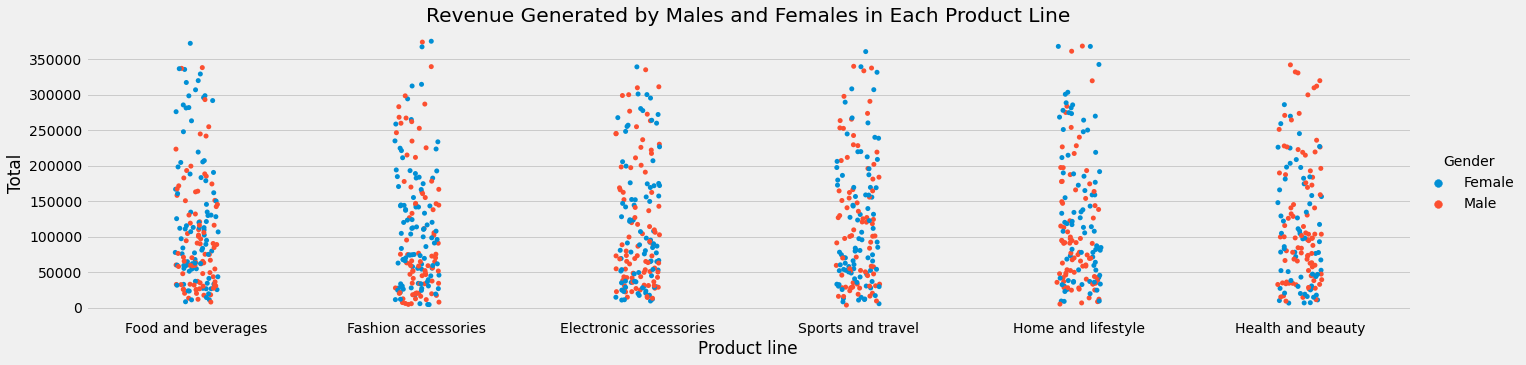

In [46]:
sns.catplot(x='Product line', y = 'Total', hue = 'Gender', aspect = 4, data = company_xyz)
plt.title('Revenue Generated by Males and Females in Each Product Line')

<ul>
  <li> Females generated more of the revenue gotten from the food and beverages, home and lifestyle products, with the Fashion accessories, while males generated more of the revenue gotten from the health and beauty product than females.</li>
  <li> The difference between the revenue generated by males and females in the Electronic accessories with the sports and travel is not much.</li>
  <li> On an average, both genders generated revenue for all products.</li>
</ul>

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

Text(0.5, 1.0, 'Product line per unit price')

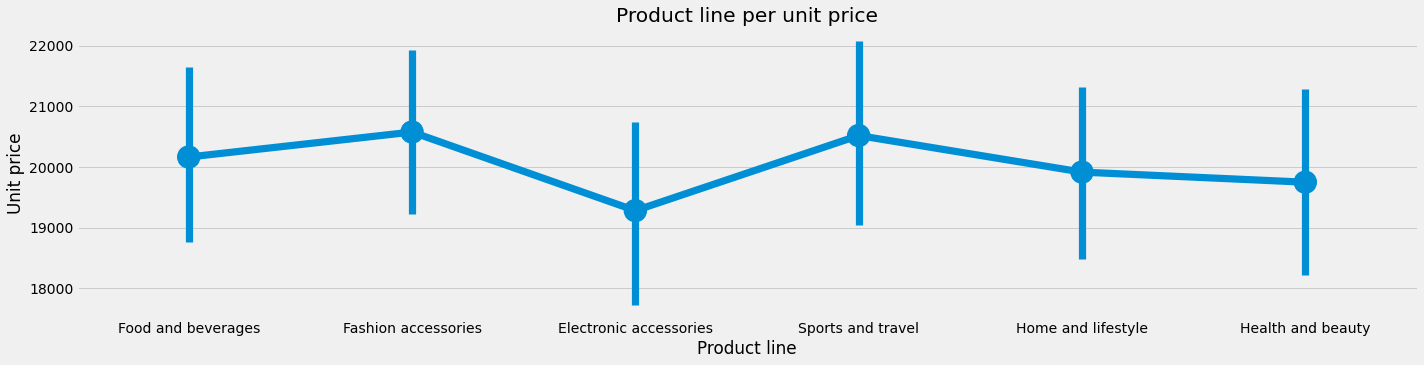

In [47]:
ax = sns.catplot(x = 'Product line', y = 'Unit price', data = company_xyz, kind = 'point', aspect = 4)
plt.title('Product line per unit price')

* The products with the highest unit price are Fashion accessories with Sports and travel, then we have Food and beverages with Home and lifestyle having almost equal unit price, then Health and beauty while Electronic accessories has the lowest unit price.

Text(0.5, 1.0, 'Product line per Quantity')

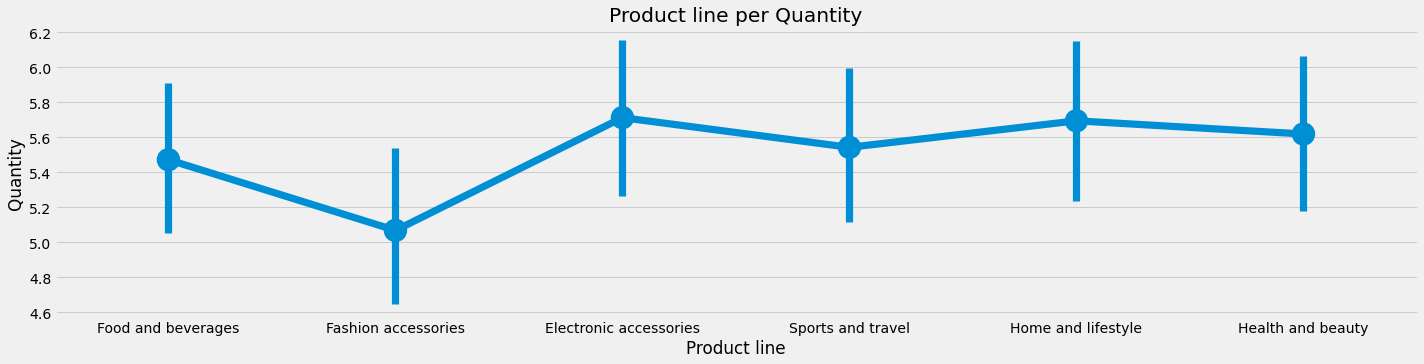

In [48]:
sns.catplot(x = 'Product line', y = 'Quantity', data = company_xyz, kind = 'point', aspect = 4)
plt.title('Product line per Quantity')

* The products purchased the most by customers are Electronic accessories with Home and lifestyle, then we have Health and beauty, followed by Sports and travel then Food and beverages, Fashion accessories is the least product purchased by customers.

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


In [49]:
company_B = company_xyz[company_xyz['Branch'] == 'B']

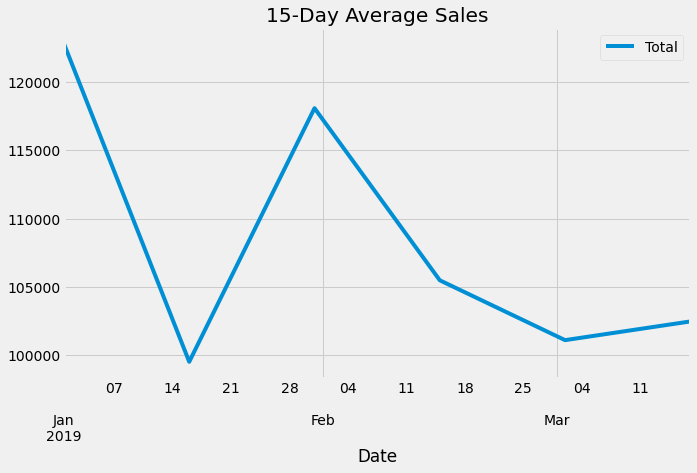

In [50]:
company_B[['Date','Total']].groupby('Date').mean().resample('15D').mean().plot(figsize=(10,6),title="15-Day Average Sales")

* Branch B experienced a decrease in sales in the first 15 days of January, then a sudden rise in sales again, until the beginning of February after this sales continues to drop until the begining of March.Then sales begins to rise slowly again in March.

In [51]:
company_B['Hour'] = company_B['Hour'].replace(dict.fromkeys([10,11,12],'Morning'))
company_B['Hour'] = company_B['Hour'].replace(dict.fromkeys([13,14,15,16,17], 'Afternoon'))
company_B['Hour'] = company_B['Hour'].replace(dict.fromkeys([18,19,20,21],'Night'))

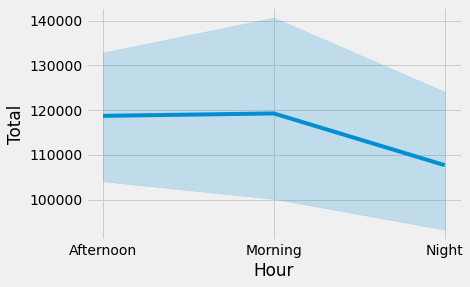

In [52]:
sns.lineplot(x = 'Hour', y = 'Total', data = company_B)

* In branch B, they sell more in the morning and afternoon compared to the night

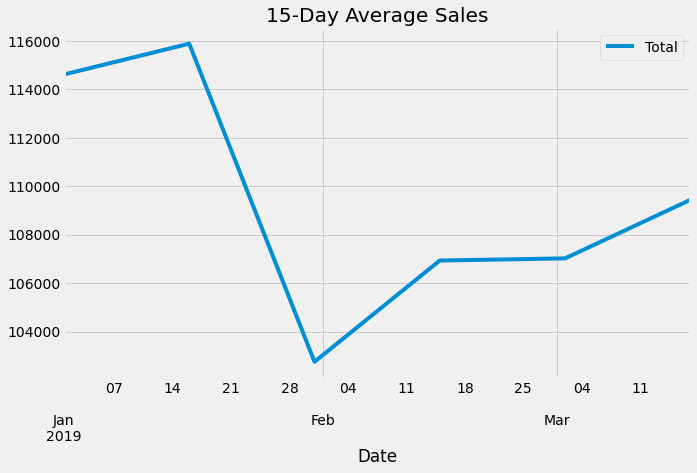

In [53]:
company_A = company_xyz[company_xyz['Branch'] == 'A']
company_A[['Date','Total']].groupby('Date').mean().resample('15D').mean().plot(figsize=(10,6),title="15-Day Average Sales")

* Sales in branch A increases until the middle of January, then it drops until the beginnning of February. After this Sales continues to rise.

In [54]:
company_A['Hour'] = company_A['Hour'].replace(dict.fromkeys([10,11,12],'Morning'))
company_A['Hour'] = company_A['Hour'].replace(dict.fromkeys([13,14,15,16,17], 'Afternoon'))
company_A['Hour'] = company_A['Hour'].replace(dict.fromkeys([18,19,20,21],'Night'))

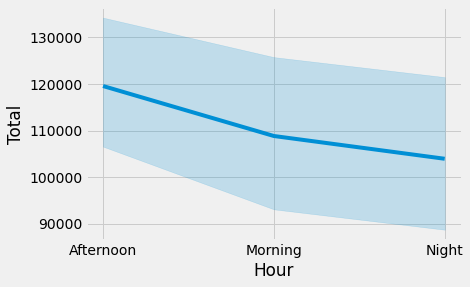

In [55]:
sns.lineplot(x = 'Hour', y = 'Total', data = company_A)

* In branch A,they sell the most in the afternoon, more in the morning and they sell the least at night

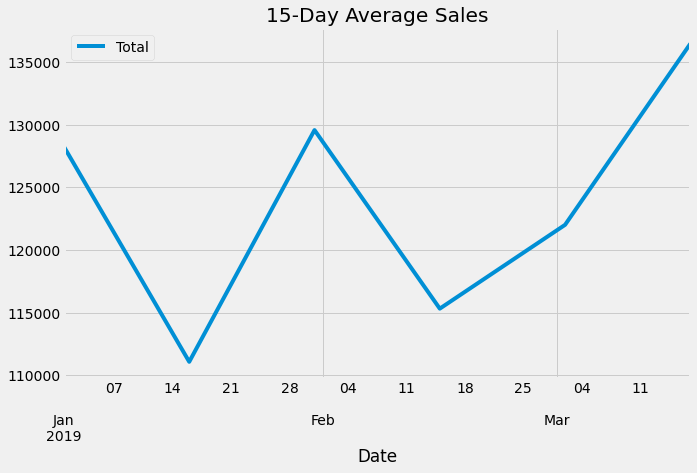

In [56]:
company_C = company_xyz[company_xyz['Branch'] == 'C']
company_C[['Date','Total']].groupby('Date').mean().resample('15D').mean().plot(figsize=(10,6),title="15-Day Average Sales")

* Sales in Branch C continues to decrease until the middle of January, it then increases until the beginning of February, decreases again till the middle of February, after this sales continues to increase.

In [57]:
company_C['Hour'] = company_C['Hour'].replace(dict.fromkeys([10,11,12],'Morning'))
company_C['Hour'] = company_C['Hour'].replace(dict.fromkeys([13,14,15,16,17], 'Afternoon'))
company_C['Hour'] = company_C['Hour'].replace(dict.fromkeys([18,19,20,21],'Night'))

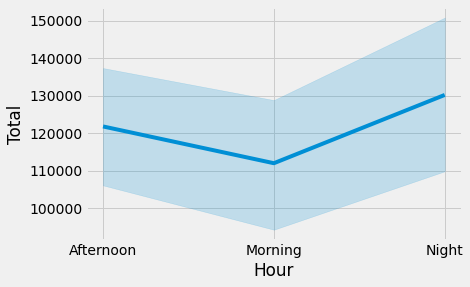

In [58]:
sns.lineplot(x = 'Hour', y = 'Total', data = company_C)

* In branch C, they sell the most at night and they sell the least in the morning

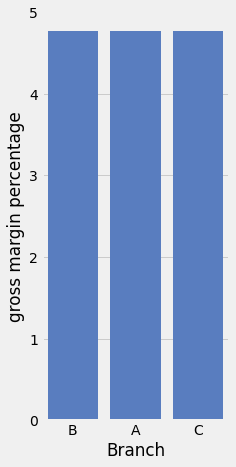

In [59]:
plt.figure(figsize = (3, 7))
sns.set_color_codes('muted')
sns.barplot(x = 'Branch', y = 'gross margin percentage', data = company_xyz, color = 'b')

* The gross margin percentage, that is the revenue remaining for the company after cost of goods sold have been deducted remains the same across all branches.

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 